In [1]:
import pandas as pd
pricing_data = pd.read_csv('Competition_Data.csv')

print(pricing_data.head())

   Index Fiscal_Week_ID   Store_ID   Item_ID   Price  Item_Quantity  \
0      0        2019-11  store_459  item_526  134.49            435   
1      1        2019-11  store_459  item_526  134.49            435   
2      2        2019-11  store_459  item_526  134.49            435   
3      3        2019-11  store_459  item_526  134.49            435   
4      4        2019-11  store_459  item_526  134.49            435   

   Sales_Amount_No_Discount  Sales_Amount  Competition_Price  
0                   4716.74      11272.59             206.44  
1                   4716.74      11272.59             158.01  
2                   4716.74      11272.59             278.03  
3                   4716.74      11272.59             222.66  
4                   4716.74      11272.59             195.32  


In [2]:
pricing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Index                     100000 non-null  int64  
 1   Fiscal_Week_ID            100000 non-null  object 
 2   Store_ID                  100000 non-null  object 
 3   Item_ID                   100000 non-null  object 
 4   Price                     100000 non-null  float64
 5   Item_Quantity             100000 non-null  int64  
 6   Sales_Amount_No_Discount  100000 non-null  float64
 7   Sales_Amount              100000 non-null  float64
 8   Competition_Price         100000 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 6.9+ MB


Start by comparing the price distribution with the competition

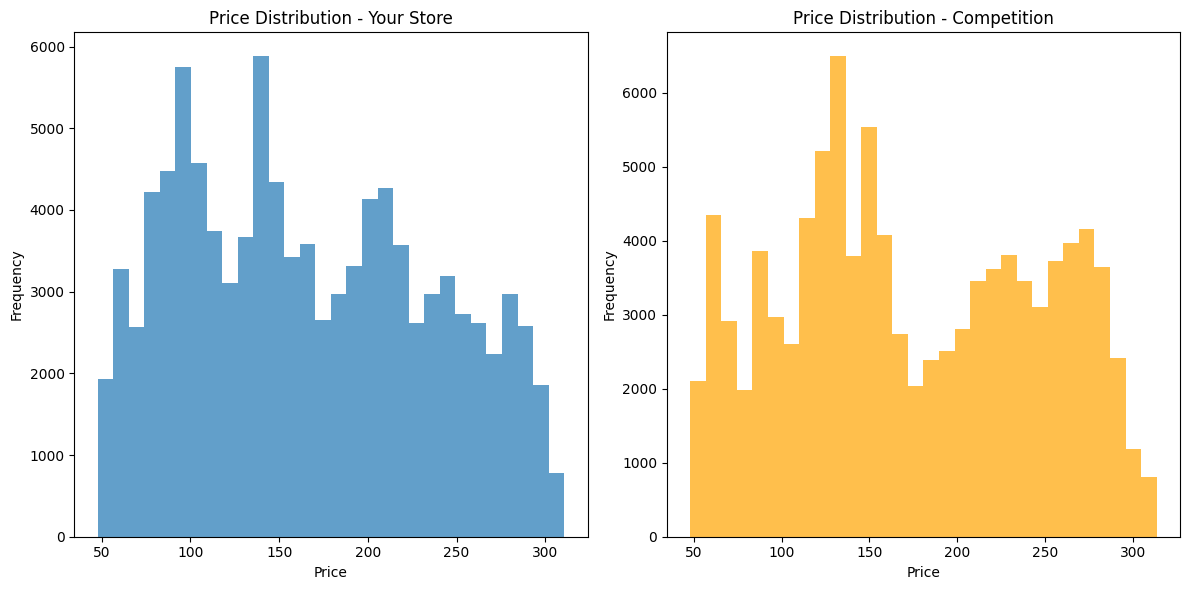

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(pricing_data['Price'], bins=30, alpha=0.7, label='Your Store')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution - Your Store')

plt.subplot(1, 2, 2)
plt.hist(pricing_data['Competition_Price'], bins=30, alpha=0.7, color='orange', label='Competition')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution - Competition')

plt.tight_layout()
plt.show()

From the histogram above, we can conclude that the competition's prices are geenrally higher, with peaks around the 100 - 150 and 200 - 250 price ranges, which indicate a concentration of higher-priced items. In contrast, our store's prices are more evenly distributed across the 50 - 300 range, with notable peaks around 100 - 150.

Compare the relationship between Price and Competition Price with Sales

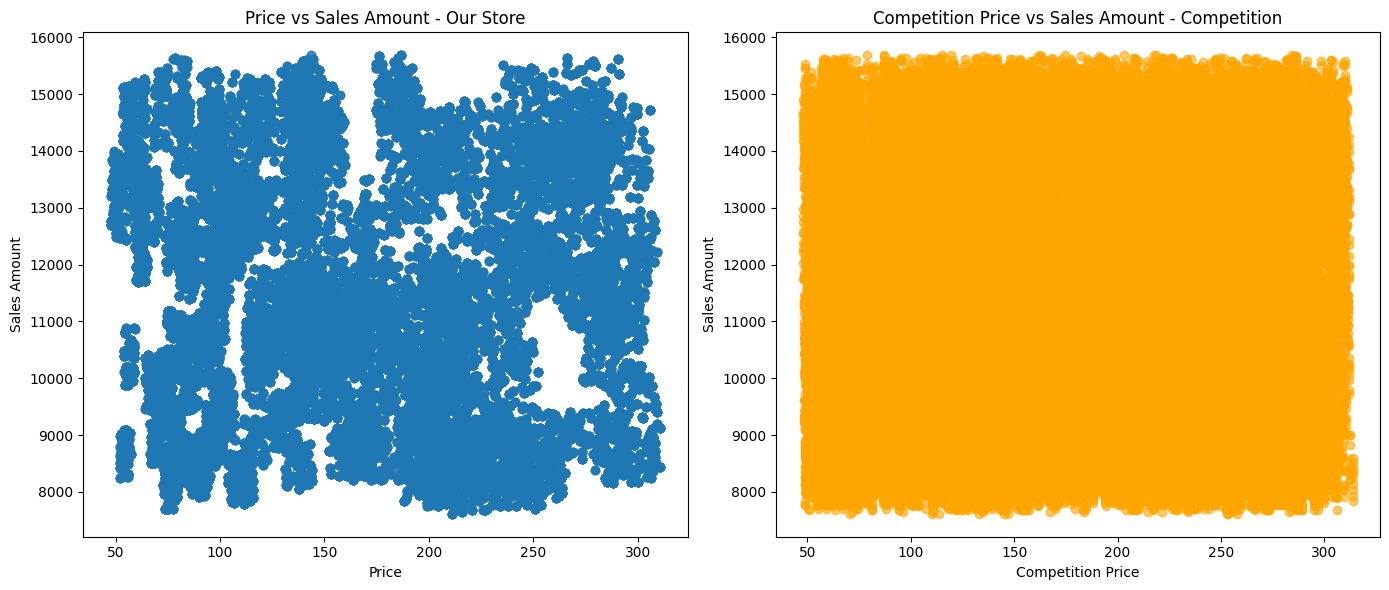

In [4]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(pricing_data['Price'], pricing_data['Sales_Amount'], alpha=0.6, label='Your Store')
plt.xlabel('Price')
plt.ylabel('Sales Amount')
plt.title('Price vs Sales Amount - Our Store')

plt.subplot(1, 2, 2)
plt.scatter(pricing_data['Competition_Price'], pricing_data['Sales_Amount'], alpha=0.6, color='orange', label='Competition')
plt.xlabel('Competition Price')
plt.ylabel('Sales Amount')
plt.title('Competition Price vs Sales Amount - Competition')

plt.tight_layout()
plt.show()

The scatter plots compares the relationship between Price and Sales Amount for Our Store (left) and the Competition (right). For Our Store, the plot shows a wide dispersion of Sales Amount across various Price points, which indicates varied performance in different price ranges without a clear trend. In contrast, the competition's plot shows a dense clustering of Sales Amount around higher values, with Prices also spread across a similar range but demonstrating a more consistent sales performance. It suggests that the competition might have a more effective Pricing strategy, which maintains higher Sales Amount more uniformly across different Price points.

Compare the Price changes over time

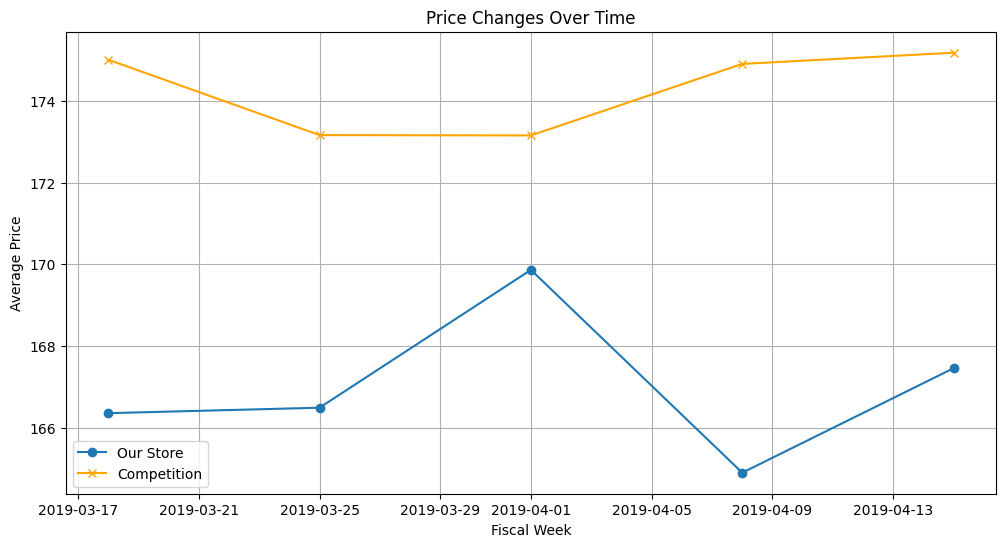

In [5]:
pricing_data['Fiscal_Week_ID'] = pd.to_datetime(pricing_data['Fiscal_Week_ID'] + '-1', format='%Y-%U-%w')
weekly_prices = pricing_data.groupby('Fiscal_Week_ID').agg({
    'Price': 'mean',
    'Competition_Price': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))

plt.plot(weekly_prices['Fiscal_Week_ID'], weekly_prices['Price'], label='Our Store', marker='o')
plt.plot(weekly_prices['Fiscal_Week_ID'], weekly_prices['Competition_Price'], label='Competition', marker='x', color='orange')

plt.xlabel('Fiscal Week')
plt.ylabel('Average Price')
plt.title('Price Changes Over Time')
plt.legend()
plt.grid(True)
plt.show()

The Competition maintains higher average prices consistently above 170, with a slight upward trend over the observed weeks. In contrast, Our Store's prices start at arounf 166, slightly increasing, and then dip before rising again. It indicates that the competition follows a more stable Pricing strategy, while Our Store experiences more fluctuations in pricing. The stability in the Competition's pricing could be contributing to their higher and more consistent sales performance.

Analyze how changes in prices affect the change in quantity sold. For this, we need to calculate price elasticity. The formula is shown below:
**Ed = % change in quantity demanded / % change in price**

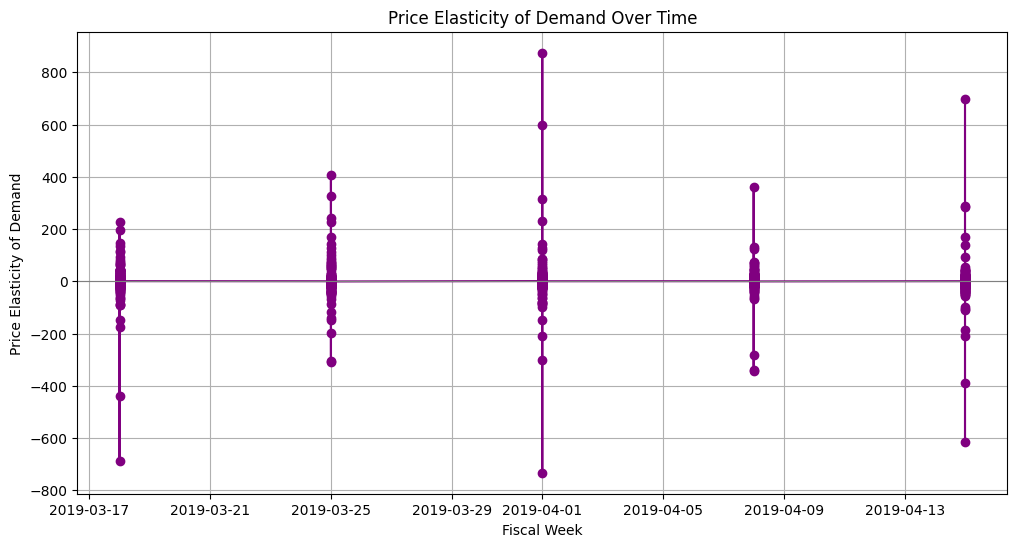

In [6]:
pricing_data['price_change'] = pricing_data['Price'].pct_change()
pricing_data['qty_change'] = pricing_data['Item_Quantity'].pct_change()

pricing_data['elasticity'] = pricing_data['qty_change'] / pricing_data['price_change']

pricing_data.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
pricing_data.dropna(subset=['elasticity'], inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(pricing_data['Fiscal_Week_ID'], pricing_data['elasticity'], marker='o', linestyle='-', color='purple')
plt.axhline(0, color='grey', linewidth=0.8)
plt.xlabel('Fiscal Week')
plt.ylabel('Price Elasticity of Demand')
plt.title('Price Elasticity of Demand Over Time')
plt.grid(True)
plt.show()

The graph shows the Price Elasticity of Demand Over Time. It highlighted significant variability in elasticity across different weeks, with values ranging from highly negative to highly positive. It indicates that the sensitivity of quantity demanded to price changes fluctuates considerably. High positive elasticity suggests that in some weeks, demand increased significantly with price increases, while high negative elasticity in other weeks indicate a sharp drop in demand with price hikes. The broad spread of elasticity values implies an inconsistent response to price changes, which suggests that factors other than price, such as promotions, seasonality, or market conditions, might be influencing demand.

Calculate and compare teh total sales amount for Our Store and Competition

In [7]:
total_sales_your_store = pricing_data['Sales_Amount'].sum()
total_sales_competition = (pricing_data['Competition_Price'] * pricing_data['Item_Quantity']).sum()

total_qty_your_store = pricing_data['Item_Quantity'].sum()
total_qty_competition = pricing_data['Item_Quantity'].sum() # Assuming the quantities sold are the same for comparison

summary = pd.DataFrame({
    'Metric': ['Total Sales Amount', 'Total Quantity Sold'],
    'Your Store': [total_sales_your_store, total_qty_your_store],
    'Competition': [total_sales_competition, total_qty_competition]
})

print(summary)

                Metric    Your Store   Competition
0   Total Sales Amount  1.141005e+08  6.962097e+08
1  Total Quantity Sold  3.984776e+06  3.984776e+06


Our Store's total sales amount is 114,100,500 whereas the Competition's total sales is 696,209,700 (assuming equal quantity sold). The competiton has a significantly higher total sales amount compared to Our Store. It indicates that their pricing strategy is more effective in generating revenue.

Now, we'll analyze how sales amount vary across different price brackets to identify f there specific price ranges where the Competition outperform Our Store.

In [8]:
# Define price brackets
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500']

# Create price brackets for both Your Store and Competition
pricing_data['price_bracket'] = pd.cut(pricing_data['Price'], bins=bins, labels=labels, right=False)
pricing_data['competition_price_bracket'] = pd.cut(pricing_data['Competition_Price'], bins=bins, labels=labels, right=False)

# Calculate Sales Amount by price bracket for Your Store
sales_by_bracket_your_store = pricing_data.groupby('price_bracket')['Sales_Amount'].sum().reset_index()
sales_by_bracket_your_store.columns = ['Price Bracket', 'Your Store Sales Amount']

# Calculate Sales Amount by Price Bracket for Competiton
pricing_data['competition_sales_amt'] = pricing_data['Competition_Price'] * pricing_data['Item_Quantity']
sales_by_bracket_competition = pricing_data.groupby('competition_price_bracket')['competition_sales_amt'].sum().reset_index()
sales_by_bracket_competition.columns = ['Price Bracket', 'Competition Sales Amount']

sales_by_bracket = pd.merge(sales_by_bracket_your_store, sales_by_bracket_competition, on='Price Bracket')

print(sales_by_bracket)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6780\114235210.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_bracket_your_store = pricing_data.groupby('price_bracket')['Sales_Amount'].sum().reset_index()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_6780\114235210.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_bracket_competition = pricing_data.groupby('competition_price_bracket')['competition_sales_amt'].sum().reset_index()


  Price Bracket  Your Store Sales Amount  Competition Sales Amount
0          0-50                346800.63              9.305357e+05
1        51-100              24636244.30              4.889277e+07
2       101-150              29645669.06              1.278404e+08
3       151-200              20658418.18              1.092184e+08
4       201-250              20742288.10              1.909748e+08
5       251-300              16778087.66              2.047670e+08
6       301-350               1292959.36              1.358583e+07
7       351-400                     0.00              0.000000e+00
8       401-450                     0.00              0.000000e+00
9       451-500                     0.00              0.000000e+00


The table shows the total sales amount for both Your Store and the Competition across different price brackets. Here are some key observations:
    **0-50 Bracket:** The Competition has significantly higher sales in this bracket.
    **51-100 Bracket:** The Competition outperforms Your Store by a wide margin.
    **101-150 Bracket:** The Competition's sales are much higher than Your Store's sales.
    **151-200 Bracket:** The Competition once again outdid Your Store's sales.
    **201-250 Bracket:** The Competition's sales are enarly double those of Your Store.
    **251-300 Bracket:** The Competition's sales is higher than Your Store but the gap is smaller comapared to the other brackets.
    **301-350 Bracket:** The Competition has higher sales than Your Store eventhough the overall sales amount is lower n this bracket compared to the others.

Price Optimization with Dynamic Pricing

Let's start by defining a dynamic pricng model and simulating its performance. Here are the steps we will use:
1. Enchance the dataset to include segments and calculate price elasticity for each segemnt.
2. Create segments based on purchasing behaviour and calculate price elasiticity for each segment.
3. Define dynamic pricing rules based on competitor pricing, demand, and elasticity.
4. Simulate the dynamic pricing model and compare it with the existing pricing strategy.

1. Data Segmentation and Price Elasticity Calculation

In [14]:
print(pricing_data['Price_avg'].isnull().sum())

Price_avg    0
Price_avg    0
Price_avg    0
Price_avg    0
dtype: int64


In [11]:
# Segment the customers based on their purchasiing behaviour

# Calculate average price and total quantity sold for each item
item_summary = pricing_data.groupby('Item_ID').agg({
    'Price': 'mean',
    'Item_Quantity': 'sum'
}).reset_index()

# Merge the item summary back to the main dataset
pricing_data = pd.merge(pricing_data, item_summary, on='Item_ID', suffixes=('', '_avg'))

# Define segments based on average price
pricing_data['segment'] = pd.cut(pricing_data['Price_avg'], bins=[0, 50, 150, 300], labels=['Low', 'Medium', 'High'])

# Calculate price elasticity for each segment
segments = pricing_data['segement'].unique()
elasticity_data = []

for segment in segments:
    segment_data = pricing_data[pricing_data['segment'] == segment]
    segment_data['price_change'] = segment_data['Price'].pct_change()
    segment_data['qty_change'] = segment_data['Item_Quantity'].pct_change()
    segment_data['elastivity'] = segment_data['qty_change'] / segment_data['price_change']
    segment_data.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
    avg_elasticity = segment_data['elasticity'].mean()
    elasticity_data.append({'segment': segment, 'avg_elasticity': avg_elasticity})

elasticity_df = pd.DataFrame(elasticity_data)

print(elasticity_df)

ValueError: Input array must be 1 dimensional

From the above code, we are segmenting customers based on their purchasing behavior by analyzing the average price and total quantity sold for each item. First, we calculated the average price and the total quantity sold for each item and merge this summary back into the main dataset. We then define the customer segemtns based on these average prices into three categories: Low, Medium, and High.

For each segment, we calculated the price elasticity of demand by measuring how the percentage change in price affects the percentage change in quantity sold.

FInally, we computed the average elasticity for each segment which provides insights into how sensitive each segment is to price changes. This helps in understanding and optimizing pricing strategies for different customer segments.

The 'High' segment has an average elasticity  of 0.143993, indicating that these customers are more sensitive to price changes. In contrast, the 'Medium' segment has a lower average elasticity of 0.071118, suggesting they are less responsive to price variations.

Based on the elasticity, we can define the following dynamic pricing rule:
1. **Medium Segment (inelastic demand):** Small changes in price will not significantly affect demand. We can slightly increase prices to maximize revenue without losing much in sales volume.
2. **High Segment (elastic demand):** Demands that are sensitive to price changes. We should optimize prices to find the sweet spot that maximizes revenue without losing sales volume.

Implement the dynamic pricing model by adjusting prices based on elasticity and simulating the impact on sales and revenue.

In [ ]:
# Create a copy of the dataset for simulation
dynamic_pricing_data = pricing_data.copy()

# Apply the dynamic pricing rules
dynamic_pricing_data.loc[dynamic_pricing_data['segment'] == 'Medium', 'dynamic_price'] = dynamic_pricing_data['Price'] * 1.05
dynamic_pricing_data.loc[dynamic_pricing_data['segment'] == 'High', 'dyynamic_price'] = dynamic_pricing_data['Price'] * 0.90

# Calculate new Sales Amount based on dynamic prices
dynamic_pricing_data['dynamic_sales_amt'] = dynamic_pricing_data['dynamic_price'] * dynamic_pricing_data['Item_Quantity']

# Compare the total Sales Amount between existing and dynamic pricing
total_sales_existing = pricing_data['Sales Amount'].sum()
total_sales_dynamic = dynamic_pricing_data['dynamic_sales_amt'].sum()

# Compare total quantity  sold between existing and dynamic pricing
total_qty_existing = pricing_data['Item_Quantity'].sum()
total_qty_dynamic = dynamic_pricing_data['Item Quantity'].sum() # Quantity sold remains the same for comparison

comparison_summary = pd.DataFrame({
    'Metric': ['Total Sales Amount', 'Total Quantity Sold'],
    'Existing Pricing': [total_sales_existing, total_qty_existing],
    'Dynamic Pricing': [total_sales_dynamic, total_qty_dynamic]
})

print(comparison_summary)

From teh above code, we simulating the impact of dynamic pricing strategy on sales performance. First, we created a copy of the dataset for simulation. Then, we applied the dynamic pricing rules by increase the prices by 5% for the 'Medium' segment and decrease the prices by 10% for the 'High' segment. Next, we calculate the new Sales Amount based on these dynamic prices. Lastly, we compared the total Sales Amount and total Quantity Sold under the existing pricing and the dynamic pricing strategies.

The dynamic pricing strategy resulted in a significantly higher total Sales Amount compared to the exisitng pricing strategy. This indicates that dynamic pricing approach is more effective in maximizing revenue.

Finish the task by adding thedynamic prices into the dataset.

In [ ]:
pricing_data['dynamic_price'] = dynamic_pricing_data['dynamic_price']